In [1]:
!which python

/Users/annikaagarwal/opt/miniconda3/envs/JupyterNotebookTesting/bin/python


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [50]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import statistics as st
from sklearn.preprocessing import StandardScaler, MinMaxScaler


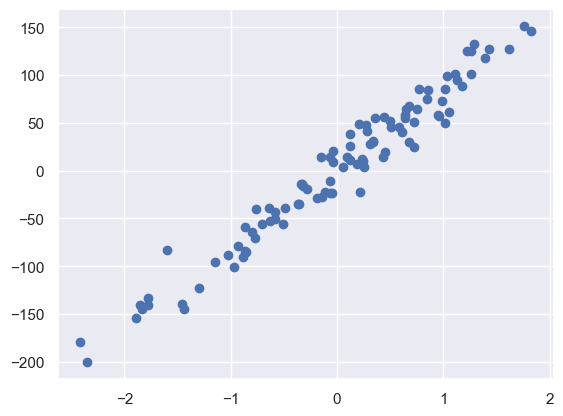

In [28]:
 X, y = datasets.make_regression(n_samples = 100, n_features = 1, noise = 15)
plt.scatter(X, y)
plt.show()

In [9]:
## calculating some data points

In [22]:
sns.set()

In [12]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
residuals = y-y_pred
standardDev = np.std(residuals)
print(standardDev)

0.1061421323093059


In [13]:
## Calculate market conditions

In [14]:
###Volatility - standard deviation multiplied by the square root of the number of time periods 
standardDev = np.std(residuals)
time_periods = len(y) ## in this case, using the given indices as time period 
Volatility = standardDev * np.sqrt(time_periods)
print(Volatility)

1.061421323093059


In [15]:
## EXAMPLE RUN OF GDP USING 1999 column. 

#grouped = gdpData.groupby(gdpData.index)
#gdpData['1999'] = pd.to_numeric(gdpData['1999'], errors='coerce')
#groupedSum = grouped['1999'].sum()
#total_sum = groupedSum.sum()
#print(groupedSum)

#print(total_sum)
#print(gdpData.columns)

In [16]:
## GDP growth - 
gdpData = pd.read_csv('gdp_dataUpdated.csv', delimiter=',')  
gdpData.keys()
year_columns = [col for col in gdpData.columns if col.isdigit()]
gdpData[year_columns] = gdpData[year_columns].apply(pd.to_numeric, errors='coerce')
year_sums = gdpData[year_columns].sum()
print(year_sums)


## for the specific datatable given, I need to find the sum of each column, which is 
#represented by the year. Will Probably be put into a dictionary. then visualize/put together 
#oveall GDP in a scatterplot.
#Goal : given a certain time frame, calculate growth percent. 

1997    140171308.8
1998    148011734.3
1999    157322984.0
2000    167377663.5
2001    172307078.9
2002    177703390.5
2003    186084838.5
2004    198398316.3
2005    211910684.7
2006    224690749.9
2007    235066295.7
2008    239053461.5
2009    234073914.4
2010    243395395.3
2011    252922020.4
2012    264039209.4
2013    273748445.2
2014    286017679.8
2015    297637529.8
2016    305770694.4
2017    319133425.0
2018    337045176.1
2019    350274625.2
2020    300405806.0
dtype: float64


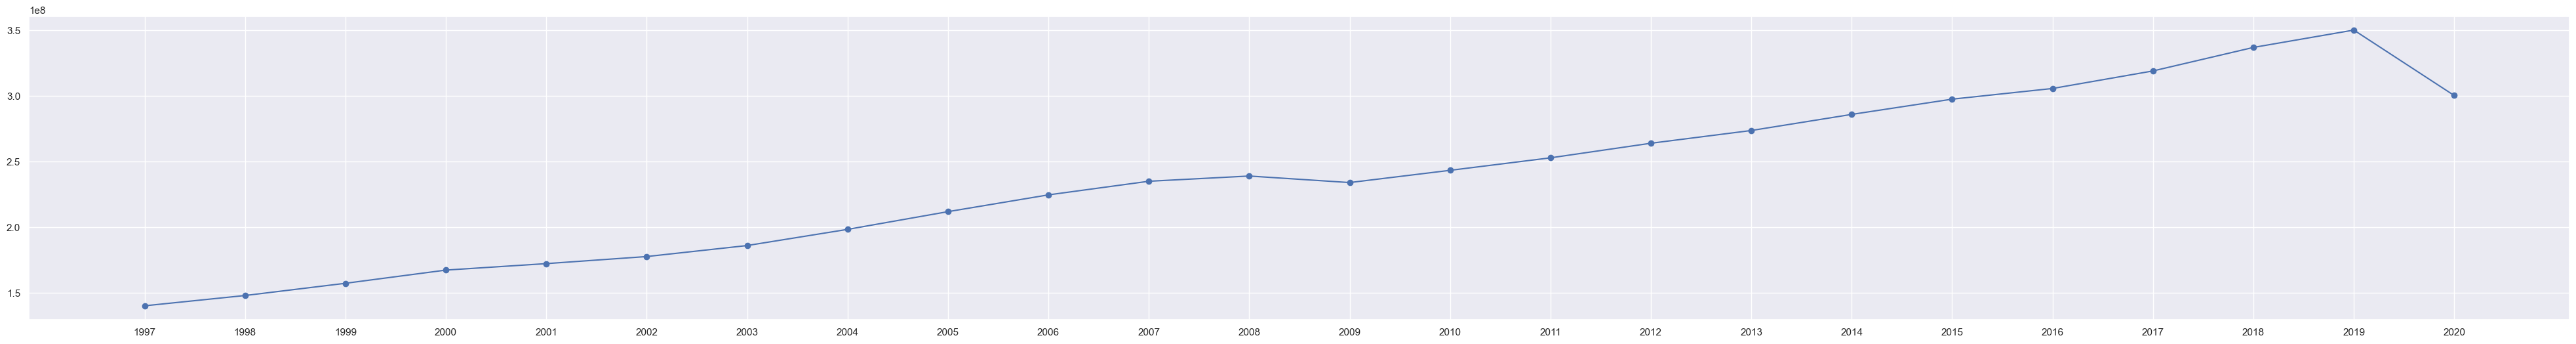

In [17]:
#visualze gdp:
plt.figure(figsize=(50, 6))
plt.plot(year_columns, year_sums, marker='o', linestyle='-', color='b')
plt.show()

1997          NaN
1998    -5.593460
1999    -6.290886
2000    -6.391107
2001    -2.945086
2002    -3.131799
2003    -4.716538
2004    -6.617131
2005    -6.810727
2006    -6.030873
2007    -4.617700
2008    -1.696188
2009     2.083027
2010    -3.982281
2011    -3.914053
2012    -4.395501
2013    -3.677195
2014    -4.481938
2015    -4.062633
2016    -2.732574
2017    -4.370180
2018    -5.612621
2019    -3.925126
2020    14.237063
dtype: float64


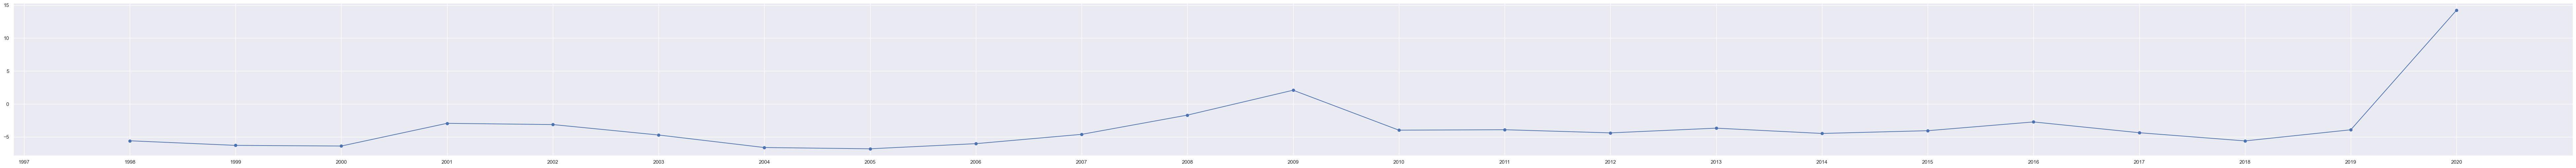

In [18]:
## inflation
inflation_rate = year_sums.pct_change() * -100 ## to invert the graph
print(inflation_rate)
plt.figure(figsize=(100, 6))
plt.plot(year_columns, inflation_rate, marker = 'o', linestyle='-', color='b')

In [40]:
# combined dataset of gdp, volatility, and inflationrate (X val)
combinedData = pd.DataFrame({
    'GDP':year_sums.values, 
    'Volatility':[Volatility for _ in range(len(year_sums))],
    'InflationRate': inflation_rate.values
})





In [55]:
#Composite Indicator (y val)
scaler = StandardScaler()
normalized_data = scaler.fit_transform(combinedData[['GDP', 'Volatility', 'InflationRate']])
normalized_df = pd.DataFrame(normalized_data, columns=['GDP', 'Volatility', 'InflationRate'])

gdp_weight = 0.2  
volatility_weight = 0.15 
inflation_weight = 0.45  

normalized_df['CompositeIndicator'] = (
    gdp_weight * normalized_df['GDP'] +
    volatility_weight * normalized_df['Volatility'] +
    inflation_weight * normalized_df['InflationRate']
)
scaler = MinMaxScaler(feature_range= (-1, 1))
normalized_df['CompositeIndicator'] = scaler.fit_transform(normalized_df[['CompositeIndicator']])


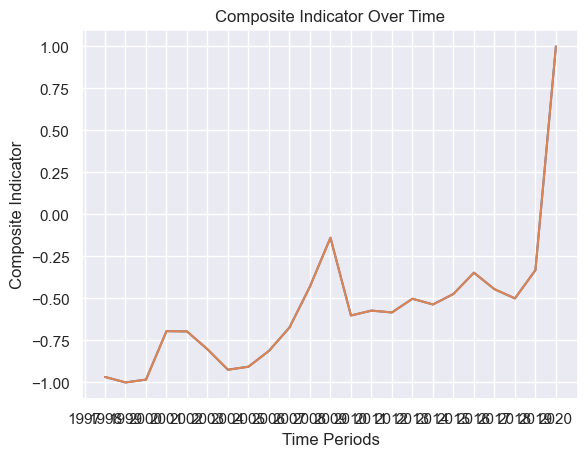

In [56]:
#Update regression model 
X = year_columns
y = normalized_df['CompositeIndicator']
plt.plot(X, y)
plt.plot(normalized_df['CompositeIndicator'])
plt.title('Composite Indicator Over Time')
plt.xlabel('Time Periods')
plt.ylabel('Composite Indicator')
plt.show()
plt.show()

In [ ]:
####
#Version one of my current project. 
#My main objective was to take in a number 
#of possible influences in the current financial market, compare it with a stock represented by a linear regression model and 
#train my model to output whether to in the stock or not, based on the current conditions. 
#This was unfortunately not able to be done, as the output wants to invest in the stock, no matter the weights. 
#However, from this project, I was able to learn the following: how to read, clean, and edit a csv file, 
#take data from said csv file and assemble different data points from that, and 
#edit said data to influence other data points. From those data points, I trained the y values(composite indicator) of the 
#linear regression model to produce an output. 
